<a href="https://colab.research.google.com/github/JeffTheAggie/365-Data-Science-Course-Machine-Learning/blob/master/TRC_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRC Data Analyst Case Study

## Import TV Data

In [7]:
import io
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import files
sns.set()

#Upload TV Data
uploaded = files.upload()

Saving Copy of Example Data - Example Data.csv.csv to Copy of Example Data - Example Data.csv (2).csv


In [44]:
#Convert TV Data to Pandas Dataframe
TV = pd.read_csv(io.BytesIO(uploaded.get('Copy of Example Data - Example Data.csv (2).csv')))
TV.head()

,Brand,Item Description,Model Number,TV type,Screen Size (Diag Inches),Standby Passive Power Watts,On Mode Power Watts,Native Verticle Resolution,Screen area,Energy Star Version Cluster,Energy Star Qualified (V8.0),ES flag,P.on,P.hr,P.on_max,Annual power consumption (kWh)
0,Samsung,"32"" QN32LS03T Widescreen LCD Ultra HDTV Ref",QN32LS03T,LCD,32,0.5,42,1080.0,425.0,All Other (Suppressed),False,False,28.017350,0.000000,28.017350,77.39095
1,Samsung,"50"" HG50Q60AAN Widescreen LCD Ultra HDTV",HG50Q60AAN,LCD,50,0.5,54,2160.0,1047.0,All Other (Suppressed),True,False,74.624074,24.874691,49.749383,98.50255
2,Samsung,"55"" QN55Q90TD Widescreen LCD Ultra HDTV",QN55Q90TD,LCD,55,0.5,100,2160.0,1276.0,All Other (Suppressed),False,False,84.738695,28.246232,56.492464,179.43035
3,Samsung,"55"" QN55QN700B Widescreen LCD Ultra HDTV",QN55QN700B,LCD,55,0.5,115,4320.0,1276.0,All Other (Suppressed),False,False,84.738695,28.246232,56.492464,205.81985
4,Samsung,"58"" UN58TU690T Widescreen LCD Ultra HDTV",UN58TU690T,LCD,58,0.5,70,2160.0,1420.0,All Other (Suppressed),True,False,90.498128,30.166043,60.332085,126.65135


## Create new Dataframe that sorts by LCD and OLED Screen types

In [45]:
#Sort by LCD and OLED Screen Types
TV_Screen_Options = ['LCD', 'OLED']
TV_df = TV.loc[TV['TV type'].isin(TV_Screen_Options)]
TV_df.head()

,Brand,Item Description,Model Number,TV type,Screen Size (Diag Inches),Standby Passive Power Watts,On Mode Power Watts,Native Verticle Resolution,Screen area,Energy Star Version Cluster,Energy Star Qualified (V8.0),ES flag,P.on,P.hr,P.on_max,Annual power consumption (kWh)
0,Samsung,"32"" QN32LS03T Widescreen LCD Ultra HDTV Ref",QN32LS03T,LCD,32,0.5,42,1080.0,425.0,All Other (Suppressed),False,False,28.017350,0.000000,28.017350,77.39095
1,Samsung,"50"" HG50Q60AAN Widescreen LCD Ultra HDTV",HG50Q60AAN,LCD,50,0.5,54,2160.0,1047.0,All Other (Suppressed),True,False,74.624074,24.874691,49.749383,98.50255
2,Samsung,"55"" QN55Q90TD Widescreen LCD Ultra HDTV",QN55Q90TD,LCD,55,0.5,100,2160.0,1276.0,All Other (Suppressed),False,False,84.738695,28.246232,56.492464,179.43035
3,Samsung,"55"" QN55QN700B Widescreen LCD Ultra HDTV",QN55QN700B,LCD,55,0.5,115,4320.0,1276.0,All Other (Suppressed),False,False,84.738695,28.246232,56.492464,205.81985
4,Samsung,"58"" UN58TU690T Widescreen LCD Ultra HDTV",UN58TU690T,LCD,58,0.5,70,2160.0,1420.0,All Other (Suppressed),True,False,90.498128,30.166043,60.332085,126.65135


## OLS Regression Calculations
### Show OLS Regression Parameters

In [59]:
#Creating x and y variables
y = TV_df['Annual power consumption (kWh)']
x = TV_df['Screen Size (Diag Inches)']

#Convert x variable to a Float
x = np.asarray(x, dtype='float64')

#Fitting Linear Regression Model and printing out the parameters
TV_LinReg = sm.OLS(y, sm.add_constant(x))
TV_results = TV_LinReg.fit()
print(TV_results.params)

const   -120.090473
x1         5.129827
dtype: float64


### Show OLS Regression Summary

In [47]:
#Displaying OLS Regression Summary
print(TV_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Annual power consumption (kWh)   R-squared:                       0.525
Model:                                        OLS   Adj. R-squared:                  0.524
Method:                             Least Squares   F-statistic:                     1471.
Date:                            Sat, 09 Nov 2024   Prob (F-statistic):          1.53e-217
Time:                                    01:04:46   Log-Likelihood:                -7634.9
No. Observations:                            1335   AIC:                         1.527e+04
Df Residuals:                                1333   BIC:                         1.528e+04
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

## Crete Linear Regression Plot

[Text(0.5, 1.0, 'Regression Plot between TV Screen Size & Annual Power Consumption'),
 Text(0.5, 0, 'TV Screen Size (Inches)'),
 Text(0, 0.5, 'Annual Power Consumption (kwh)')]

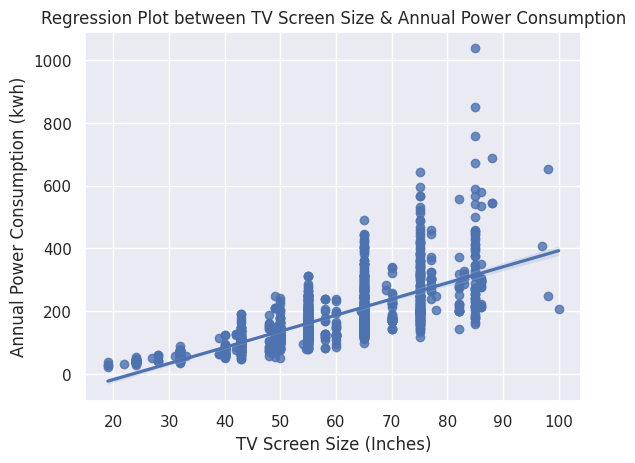

In [48]:
#Plotting the Linear Regression model
sns.regplot(x= x, y= y, data=TV_df).set(title='Regression Plot between TV Screen Size & Annual Power Consumption', xlabel='TV Screen Size (Inches)', ylabel='Annual Power Consumption (kwh)')

## Box Plot Between TV Screen Type and Annual Power Consumption


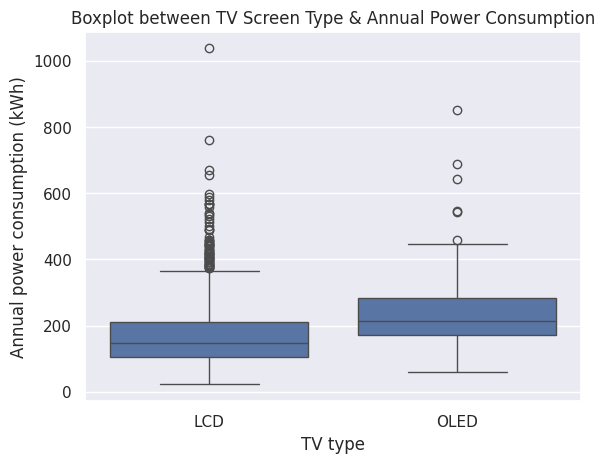

In [53]:
#Plotting box plot between TV Screen Type and Annual Power Consumption
ns.boxplot(x='TV type', y='Annual power consumption (kWh)', data=TV_df)
plt.title("Boxplot between TV Screen Type & Annual Power Consumption")
plt.show()